Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-199.646,-209.277,2.45139e-56
2,140.151,4.0,-197.259,-206.877,2.70402e-55
3,140.302,4.0,-194.901,-204.505,2.89899e-54
4,140.452,4.0,-192.572,-202.161,3.02079e-53
5,140.603,4.0,-190.271,-199.846,3.05937e-52
6,140.754,4.0,-187.998,-197.559,3.01148e-51
7,140.905,4.0,-185.754,-195.3,2.88116e-50
8,141.055,4.0,-183.538,-193.07,2.67912e-49
9,141.206,4.0,-181.35,-190.869,2.42133e-48


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,155.528,8.58291,-73.7486,-82.2065,0.376351
2,153.568,7.61809,-73.475,-82.0478,0.441079
3,151.005,9.06533,-72.98,-81.7176,0.613682
4,153.568,10.0302,-72.847,-81.4199,0.826471
5,151.91,10.191,-72.9036,-81.5812,0.703342
6,153.869,10.191,-72.9604,-81.5149,0.751542
7,154.472,9.70854,-73.0039,-81.5225,0.745844
8,155.829,10.5126,-73.8391,-82.2802,0.349626
9,155.075,12.1206,-74.3242,-82.8078,0.206289


### Snippet 4.23

Density of sigma

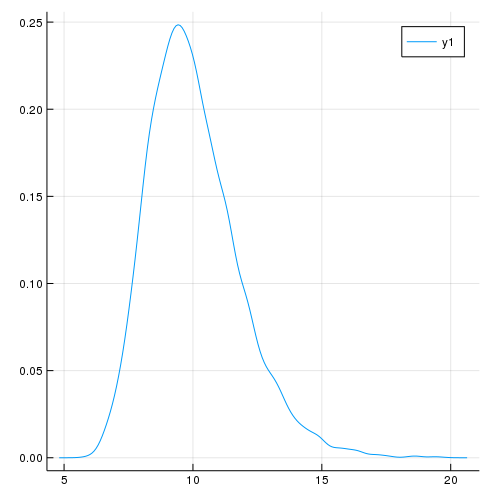

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*